In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('./semstamp_attacks/filtered_data.csv')
# df = pd.read_csv('semstamp_attacks/06_01_prompt_based_lotr_3.csv')
# df = pd.read_csv('06_01_prompt_based_gpt.csv')
df = pd.read_csv('semstamp_attacks/06_01_prompt_based_lotr_word.csv')

df.columns

Index(['step_num', 'current_text', 'mutated_text', 'current_text_len',
       'mutated_text_len', 'length_issue', 'quality_analysis',
       'quality_preserved', 'watermark_detected', 'watermark_score',
       'backtrack', 'timestamp'],
      dtype='object')

In [5]:
len(df)

72

In [6]:
len_filtered_df = df[df["length_issue"] == False]

len_filtered_df["quality_analysis"][1]

'{\'original_analysis\': \'### Analysis and Comparison of Responses:\\n\\n#### Repetition:\\n- Response A: Doesn\\\'t have any unnecessary repetition.\\n- Response B: Contains repetitive sentences and phrases, such as "The struggle for power is a dominant force that drives the plot forward, propelling characters towards their destinies." This repetition lowers the quality of the response.\\n\\n#### Grammar:\\n- Response A: Well-structured sentences with correct grammar and punctuation.\\n- Response B: Also well-structured with correct grammar and punctuation, except for missing a space before the dash in "Middle-earth—including the Elves."\\n\\n#### Coherence:\\n- Both responses are well-structured and easy to follow. They present a coherent analysis of the role of power in the Lord of the Rings series.\\n\\n#### Relevance:\\n- Both responses directly address the given prompt by discussing the role of power in the Lord of the Rings series.\\n\\n#### Accuracy:\\n- Both responses accurat

In [7]:
len(len_filtered_df)

72

In [8]:
import pandas as pd
import ast
from collections import Counter

def parse_and_aggregate_quality_analysis(data):
    # Filter rows where 'length_issue' is False
    filtered_data = data[data['length_issue'] == False]

    # Convert the quality_analysis column from string to dictionary
    quality_analysis_dicts = filtered_data['quality_analysis'].apply(ast.literal_eval)

    # Initialize counters for original and follow-up analyses
    original_analysis_counter = Counter()
    followup_analysis_counter = Counter()

    for analysis in quality_analysis_dicts:
        # Extract original and followup analyses
        original_answer = analysis.get('original_answer', '')
        followup_answer = analysis.get('followup_answer', '')

        # Update the counters
        original_analysis_counter[original_answer] += 1
        if followup_answer:
            followup_analysis_counter[followup_answer] += 1

    # Convert counters to DataFrames for better readability
    original_analysis_agg = pd.DataFrame(original_analysis_counter.items(), columns=['Analysis', 'Count'])
    followup_analysis_agg = pd.DataFrame(followup_analysis_counter.items(), columns=['Analysis', 'Count'])

    return original_analysis_agg, followup_analysis_agg

# Example usage with the provided data
original_analysis_agg, followup_analysis_agg = parse_and_aggregate_quality_analysis(len_filtered_df)



In [9]:
original_analysis_agg

,Analysis,Count
0,A,29
1,Equal,34
2,B,9


In [10]:
followup_analysis_agg

,Analysis,Count
0,A,18
1,B,9
2,Equal,45


In [11]:
quality_preserved_df = df[df['quality_preserved'] == True]

In [12]:
len(quality_preserved_df)

40

In [19]:
quality_preserved_df["mutated_text"].iloc[1]

" In J.R.R. Tolkien's esteemed Lord of the Rings series, power is a pervasive and profound theme that underscores the narrative's exploration of morality, toils, and triumphs. The struggle for power is a dominant force that drives the plot forward, propelling characters towards their destinies. The primary embodiment of power in the series is, undoubtedly, the One Ring. Forged by the Dark Lord Sauron, this talismanic artifact represents the apex of dark power, corrupting all who come into contact with it. The Ring's insidious influence seduces even the strongest of wills, exemplified by Boromir's tragic fallibility. As the quest to destroy the Ring unfolds, the pernicious nature of power becomes increasingly apparent, its corrosive effects seeping into the very fabric of Middle-earth's social hierarchy. Conversely, the free peoples of Middle-earth – including the Elves, Dwarves, and Humans – exemplify an alternative form of power: one rooted in wisdom, courage, and fellowship. This ben

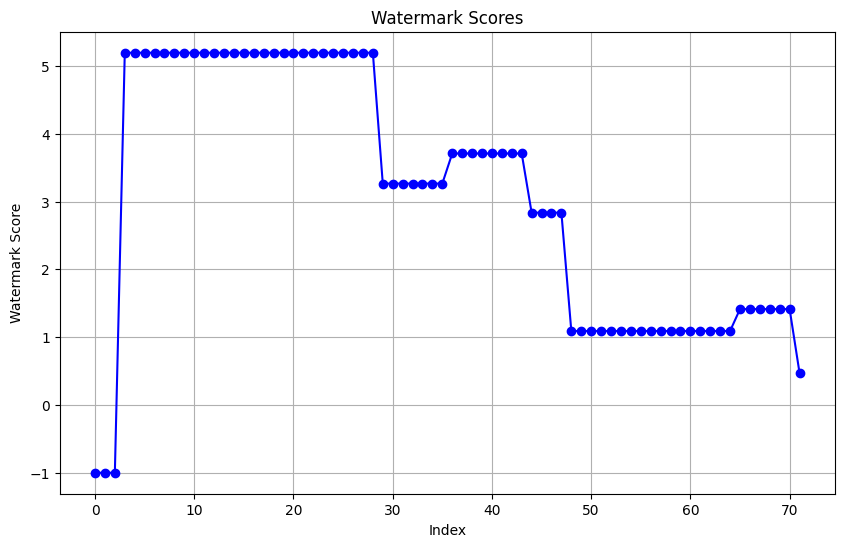

In [20]:

# Plotting the watermark_scores
plt.figure(figsize=(10, 6))
plt.plot(df['watermark_score'], marker='o', linestyle='-', color='b')
plt.title('Watermark Scores')
plt.xlabel('Index')
plt.ylabel('Watermark Score')
plt.grid(True)
plt.show()

In [14]:
df['mutated_text'].iloc[0]

" In J.R.R. Tolkien's esteemed Lord of the Rings series, power is a pervasive and profound theme that underscores the narrative's themes of morality, toils, and triumphs. The struggle for power is a dominant force that drives the plot forward, propelling characters towards their destinies. The primary embodiment of power in the series is, undoubtedly, the One Ring. Forged by the Dark Lord Sauron, this talismanic artifact represents the apex of dark power, corrupting all who come into contact with it. The Ring's insidious influence seduces even the strongest of wills, exemplified by Boromir's tragic fallibility. As the quest to destroy the Ring unfolds, the pernicious nature of power becomes increasingly apparent, its corrosive effects seeping into the very fabric of Middle-earth's social hierarchy. Conversely, the free peoples of Middle-earth – including the Elves, Dwarves, and Humans – exemplify an alternative form of power: one rooted in wisdom, courage, and fellowship. This benevole